# FITTING MOFA MODEL COMPARING BETWEEN CELL LINES (KPB25L VS KPB25L - UV ) #


In [12]:
%pip install mofax
%pip install muon
%pip install omnipath
%pip install marsilea
%pip install mofapy2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install decoupler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 62.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 58.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [decoupler]/6 [decoupler]]-cu12]
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd

import scanpy as sc

import plotnine as p9

import liana as li

# load muon and mofax
import muon as mu
import mofax as mofa
import mofapy2

import decoupler as dc

In [2]:
mdata = mudata.read("/root/workdir/HDAC_tfm/data/anndata/Mudata_human_27_05.h5mu")

/usr/local/lib/python3.10/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
/usr/local/lib/python3.10/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.


In [3]:
import logging
logging.disable(logging.WARNING) # This is to avoid too many logs because of GSEApy

import warnings
warnings.filterwarnings('ignore')

In [4]:
mdata

MuData object with n_obs × n_vars = 8 × 90739
  obs:	'treat', 'cell_line'
  64 modalities
    Macrophages&Naive CD8+ T cells:	8 x 748
    Natural killer  cells&Pre-B cells:	8 x 999
    Pro-B cells&Plasmacytoid Dendritic cells:	7 x 3006
    Pro-B cells&Pre-B cells:	7 x 3006
    Macrophages&Macrophages:	8 x 640
    Pro-B cells&Natural killer  cells:	7 x 3006
    Pre-B cells&Cancer cells:	8 x 1060
    Pro-B cells&Pro-B cells:	7 x 3006
    Natural killer  cells&Cancer cells:	8 x 986
    Pro-B cells&Endothelial:	7 x 3006
    Pro-B cells&Cancer cells:	7 x 3006
    Natural killer  cells&Endothelial:	8 x 1029
    Pre-B cells&Pre-B cells:	8 x 1062
    Pre-B cells&Natural killer  cells:	8 x 1108
    Natural killer  cells&Natural killer  cells:	8 x 1064
    Natural killer  cells&Macrophages:	8 x 812
    Cancer cells&Cancer cells:	8 x 1006
    Pro-B cells&Macrophages:	7 x 3006
    Pre-B cells&Macrophages:	8 x 857
    Natural killer  cells&Plasmacytoid Dendritic cells:	8 x 1029
    Endothelial&Cancer cells:	8 x 856
    Pre-B cells&Endothelial:	8 x 1068
    Macrophages&Endothelial:	8 x 702
    Endothelial&Pre-B cells:	8 x 855
    Pro-B cells&Naive CD8+ T cells:	7 x 3006
    Pre-B cells&Naive CD8+ T cells:	8 x 1092
    Cancer cells&Pre-B cells:	8 x 1012
    Natural killer  cells&Naive CD8+ T cells:	8 x 1042
    Cancer cells&Natural killer  cells:	8 x 1056
    Cancer cells&Macrophages:	8 x 810
    Cancer cells&Endothelial:	8 x 1020
    Endothelial&Macrophages:	8 x 727
    Endothelial&Natural killer  cells:	8 x 909
    Cancer cells&Naive CD8+ T cells:	8 x 1050
    Pre-B cells&Plasmacytoid Dendritic cells:	8 x 1099
    Endothelial&Naive CD8+ T cells:	8 x 912
    Natural killer  cells&Pro-B cells:	7 x 3006
    Plasmacytoid Dendritic cells&Endothelial:	8 x 1071
    Macrophages&Natural killer  cells:	8 x 706
    Plasmacytoid Dendritic cells&Natural killer  cells:	8 x 1113
    Endothelial&Endothelial:	8 x 899
    Cancer cells&Plasmacytoid Dendritic cells:	8 x 1054
    Endothelial&Plasmacytoid Dendritic cells:	8 x 897
    Plasmacytoid Dendritic cells&Macrophages:	8 x 835
    Macrophages&Pre-B cells:	8 x 703
    Naive CD8+ T cells&Plasmacytoid Dendritic cells:	8 x 891
    Plasmacytoid Dendritic cells&Pre-B cells:	8 x 1044
    Naive CD8+ T cells&Pre-B cells:	8 x 880
    Macrophages&Cancer cells:	8 x 712
    Naive CD8+ T cells&Natural killer  cells:	8 x 906
    Endothelial&Pro-B cells:	7 x 3006
    Naive CD8+ T cells&Pro-B cells:	7 x 3007
    Plasmacytoid Dendritic cells&Cancer cells:	8 x 1036
    Pre-B cells&Pro-B cells:	7 x 3006
    Naive CD8+ T cells&Endothelial:	8 x 889
    Plasmacytoid Dendritic cells&Plasmacytoid Dendritic cells:	8 x 1070
    Naive CD8+ T cells&Cancer cells:	8 x 891
    Naive CD8+ T cells&Macrophages:	8 x 741
    Macrophages&Plasmacytoid Dendritic cells:	8 x 719
    Cancer cells&Pro-B cells:	7 x 3006
    Plasmacytoid Dendritic cells&Pro-B cells:	7 x 3008
    Macrophages&Pro-B cells:	7 x 3006
    Naive CD8+ T cells&Naive CD8+ T cells:	8 x 937
    Plasmacytoid Dendritic cells&Naive CD8+ T cells:	8 x 1042

In [14]:
mu.tl.mofa(mdata,
           use_obs='union',
           convergence_mode='medium',
           outfile='/root/workdir/HDAC_tfm/data/anndata/MOFA/mofatalk.h5ad',
           n_factors=4,
           )


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='Macrophages&Naive CD8+ T cells' group='group1' with N=8 samples and D=748 features...
Loaded view='Natural killer  cells&Pre-B cells' group='group1' with N=8 samples and D=999 features...
Loaded view='Pro-B cells&Plasmacytoid Dendritic cells' group='group1' with N=8 samples and D=3006 features...
Loaded view='Pro-B cells&Pre-B cells' group='group1' with N=8 samples 

In [16]:
dc.get_metadata_associations(
    mdata,
    obs_keys = ['treat', 'cell_line'],  # Metadata columns to associate to PCs
    obsm_key='X_mofa',  # Where the PCs are stored
    uns_key='mofa_anova',  # Where the results are stored
    inplace=True,
)

dc.plot_associations(
    mdata,
    uns_key='mofa_anova',  # Summary statistics from the anova tests
    obsm_key='X_mofa',  # where the PCs are stored
    stat_col='p_adj',  # Which summary statistic to plot
    obs_annotation_cols = ['treat', 'cell_line'], # which sample annotations to plot
    titles=['Principle component scores', 'Adjusted p-values from ANOVA'],
    figsize=(7, 5),
    n_factors=10,
)

AttributeError: module 'decoupler' has no attribute 'get_metadata_associations'

In [19]:
# obtain the factor scores as a dataframe
factor_scores = li.ut.get_factor_scores(mdata, obsm_key='X_mofa', obs_keys=['treat', 'cell_line'])
factor_scores.head(8)

,index,Factor1,Factor2,Factor3,Factor4,treat,cell_line
0,KAP25L-UV_Combination,-3.307021e-37,-5.178522e-38,-5.916348e-34,1.409095e-13,Combination,KAP25L-UV
1,KAP25L-UV_DAC,-8.763086e-38,-1.359484e-38,-1.664782e-34,3.170362e-14,DAC,KAP25L-UV
2,KAP25L-UV_PD-L1,-3.148586e-36,-4.952729e-37,-5.681867e-33,1.203197e-12,PD-L1,KAP25L-UV
3,KAP25L-UV_control,9.251471e-37,1.449978e-37,1.682797e-33,-3.035216e-13,control,KAP25L-UV
4,KAP25L_Combination,1.365578e-36,2.158746e-37,2.415136e-33,-5.096946e-13,Combination,KAP25L
5,KAP25L_DAC,8.284965e-37,1.311532e-37,1.483817e-33,-3.004461e-13,DAC,KAP25L
6,KAP25L_PD-L1,-6.999865e-38,-1.145242e-38,-1.126862e-34,2.540370e-14,PD-L1,KAP25L
7,KAP25L_control,5.480790e-37,8.472014e-38,1.033114e-33,-3.104133e-13,control,KAP25L


In [20]:
from scipy.stats import ttest_rel

In [21]:
group1 = factor_scores[factor_scores['cell_line']=='KAP25L-UV']
group2 = factor_scores[factor_scores['cell_line']=='KAP25L']

# get all columns that contain factor & loop
factors = [col for col in factor_scores.columns if 'Factor' in col]
for factor in factors:
    print(ttest_rel(group1[factor], group2[factor]))

TtestResult(statistic=np.float64(-1.8368229459109695), pvalue=np.float64(0.16355430177765745), df=np.int64(3))
TtestResult(statistic=np.float64(-1.8352618715104372), pvalue=np.float64(0.16380874647268834), df=np.int64(3))
TtestResult(statistic=np.float64(-1.8419026293047331), pvalue=np.float64(0.162729509033616), df=np.int64(3))
TtestResult(statistic=np.float64(2.172651066621957), pvalue=np.float64(0.11816139124380774), df=np.int64(3))


There are no significative diferences for factors!

In [64]:
mu.tl.mofa(mdata,
           use_obs='union',
           convergence_mode='slow',
           outfile='/root/workdir/HDAC_tfm/data/anndata/MOFA/mofatalk_4f.h5ad',
           n_factors=4,
           )


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='Macrophages&Naive CD8+ T cells' group='group1' with N=8 samples and D=748 features...
Loaded view='Natural killer  cells&Pre-B cells' group='group1' with N=8 samples and D=999 features...
Loaded view='Pro-B cells&Plasmacytoid Dendritic cells' group='group1' with N=8 samples and D=3006 features...
Loaded view='Pro-B cells&Pre-B cells' group='group1' with N=8 samples 

In [65]:
# obtain the factor scores as a dataframe
factor_scores = li.ut.get_factor_scores(mdata, obsm_key='X_mofa', obs_keys=['treat', 'cell_line'])
factor_scores.head(8)

,index,Factor1,Factor2,Factor3,Factor4,treat,cell_line
0,KAP25L-UV_Combination,-1.951196e-56,-2.618626e-57,-5.599431e-53,3.582955e-29,Combination,KAP25L-UV
1,KAP25L-UV_DAC,-4.196241e-57,-5.756726e-58,-1.265206e-53,6.243535e-30,DAC,KAP25L-UV
2,KAP25L-UV_PD-L1,-1.865092e-55,-2.513899e-56,-5.406194e-52,3.140292e-28,PD-L1,KAP25L-UV
3,KAP25L-UV_control,5.224439e-56,7.069440e-57,1.523188e-52,-7.734862e-29,control,KAP25L-UV
4,KAP25L_Combination,8.544939e-56,1.147046e-56,2.438015e-52,-1.400631e-28,Combination,KAP25L
5,KAP25L_DAC,5.099638e-56,6.873919e-57,1.472222e-52,-8.264717e-29,DAC,KAP25L
6,KAP25L_PD-L1,-5.706028e-57,-7.558760e-58,-1.553087e-53,9.055215e-30,PD-L1,KAP25L
7,KAP25L_control,2.827493e-56,3.815160e-57,8.474497e-53,-6.718455e-29,control,KAP25L


In [66]:
group1 = factor_scores[factor_scores['cell_line']=='KAP25L-UV']
group2 = factor_scores[factor_scores['cell_line']=='KAP25L']

# get all columns that contain factor & loop
factors = [col for col in factor_scores.columns if 'Factor' in col]
for factor in factors:
    print(ttest_rel(group1[factor], group2[factor]))

TtestResult(statistic=np.float64(-1.8421575894494078), pvalue=np.float64(0.16268823806033467), df=np.int64(3))
TtestResult(statistic=np.float64(-1.8383970400196312), pvalue=np.float64(0.1632981981472566), df=np.int64(3))
TtestResult(statistic=np.float64(-1.8446569963211255), pvalue=np.float64(0.1622842949373022), df=np.int64(3))
TtestResult(statistic=np.float64(2.0919593720413845), pvalue=np.float64(0.12753845791663798), df=np.int64(3))


In [67]:
long_df = pd.melt(
    factor_scores,
    id_vars=['cell_line'],          # Columnas que no se funden
    value_vars=[col for col in factor_scores.columns if 'Factor' in col],  # Columnas de factores
    var_name='Factor',              # Nueva columna que indica el nombre del factor
    value_name='Score'              # Nueva columna con el valor del factor
)

In [62]:
long_df

,cell_line,Factor,Score
0,KAP25L-UV,Factor1,1.659501e-27
1,KAP25L-UV,Factor1,3.139059e-28
2,KAP25L-UV,Factor1,1.407476e-26
3,KAP25L-UV,Factor1,-3.427313e-27
4,KAP25L,Factor1,-6.177360e-27
5,KAP25L,Factor1,-3.667246e-27
6,KAP25L,Factor1,3.874000e-28
7,KAP25L,Factor1,-3.236257e-27


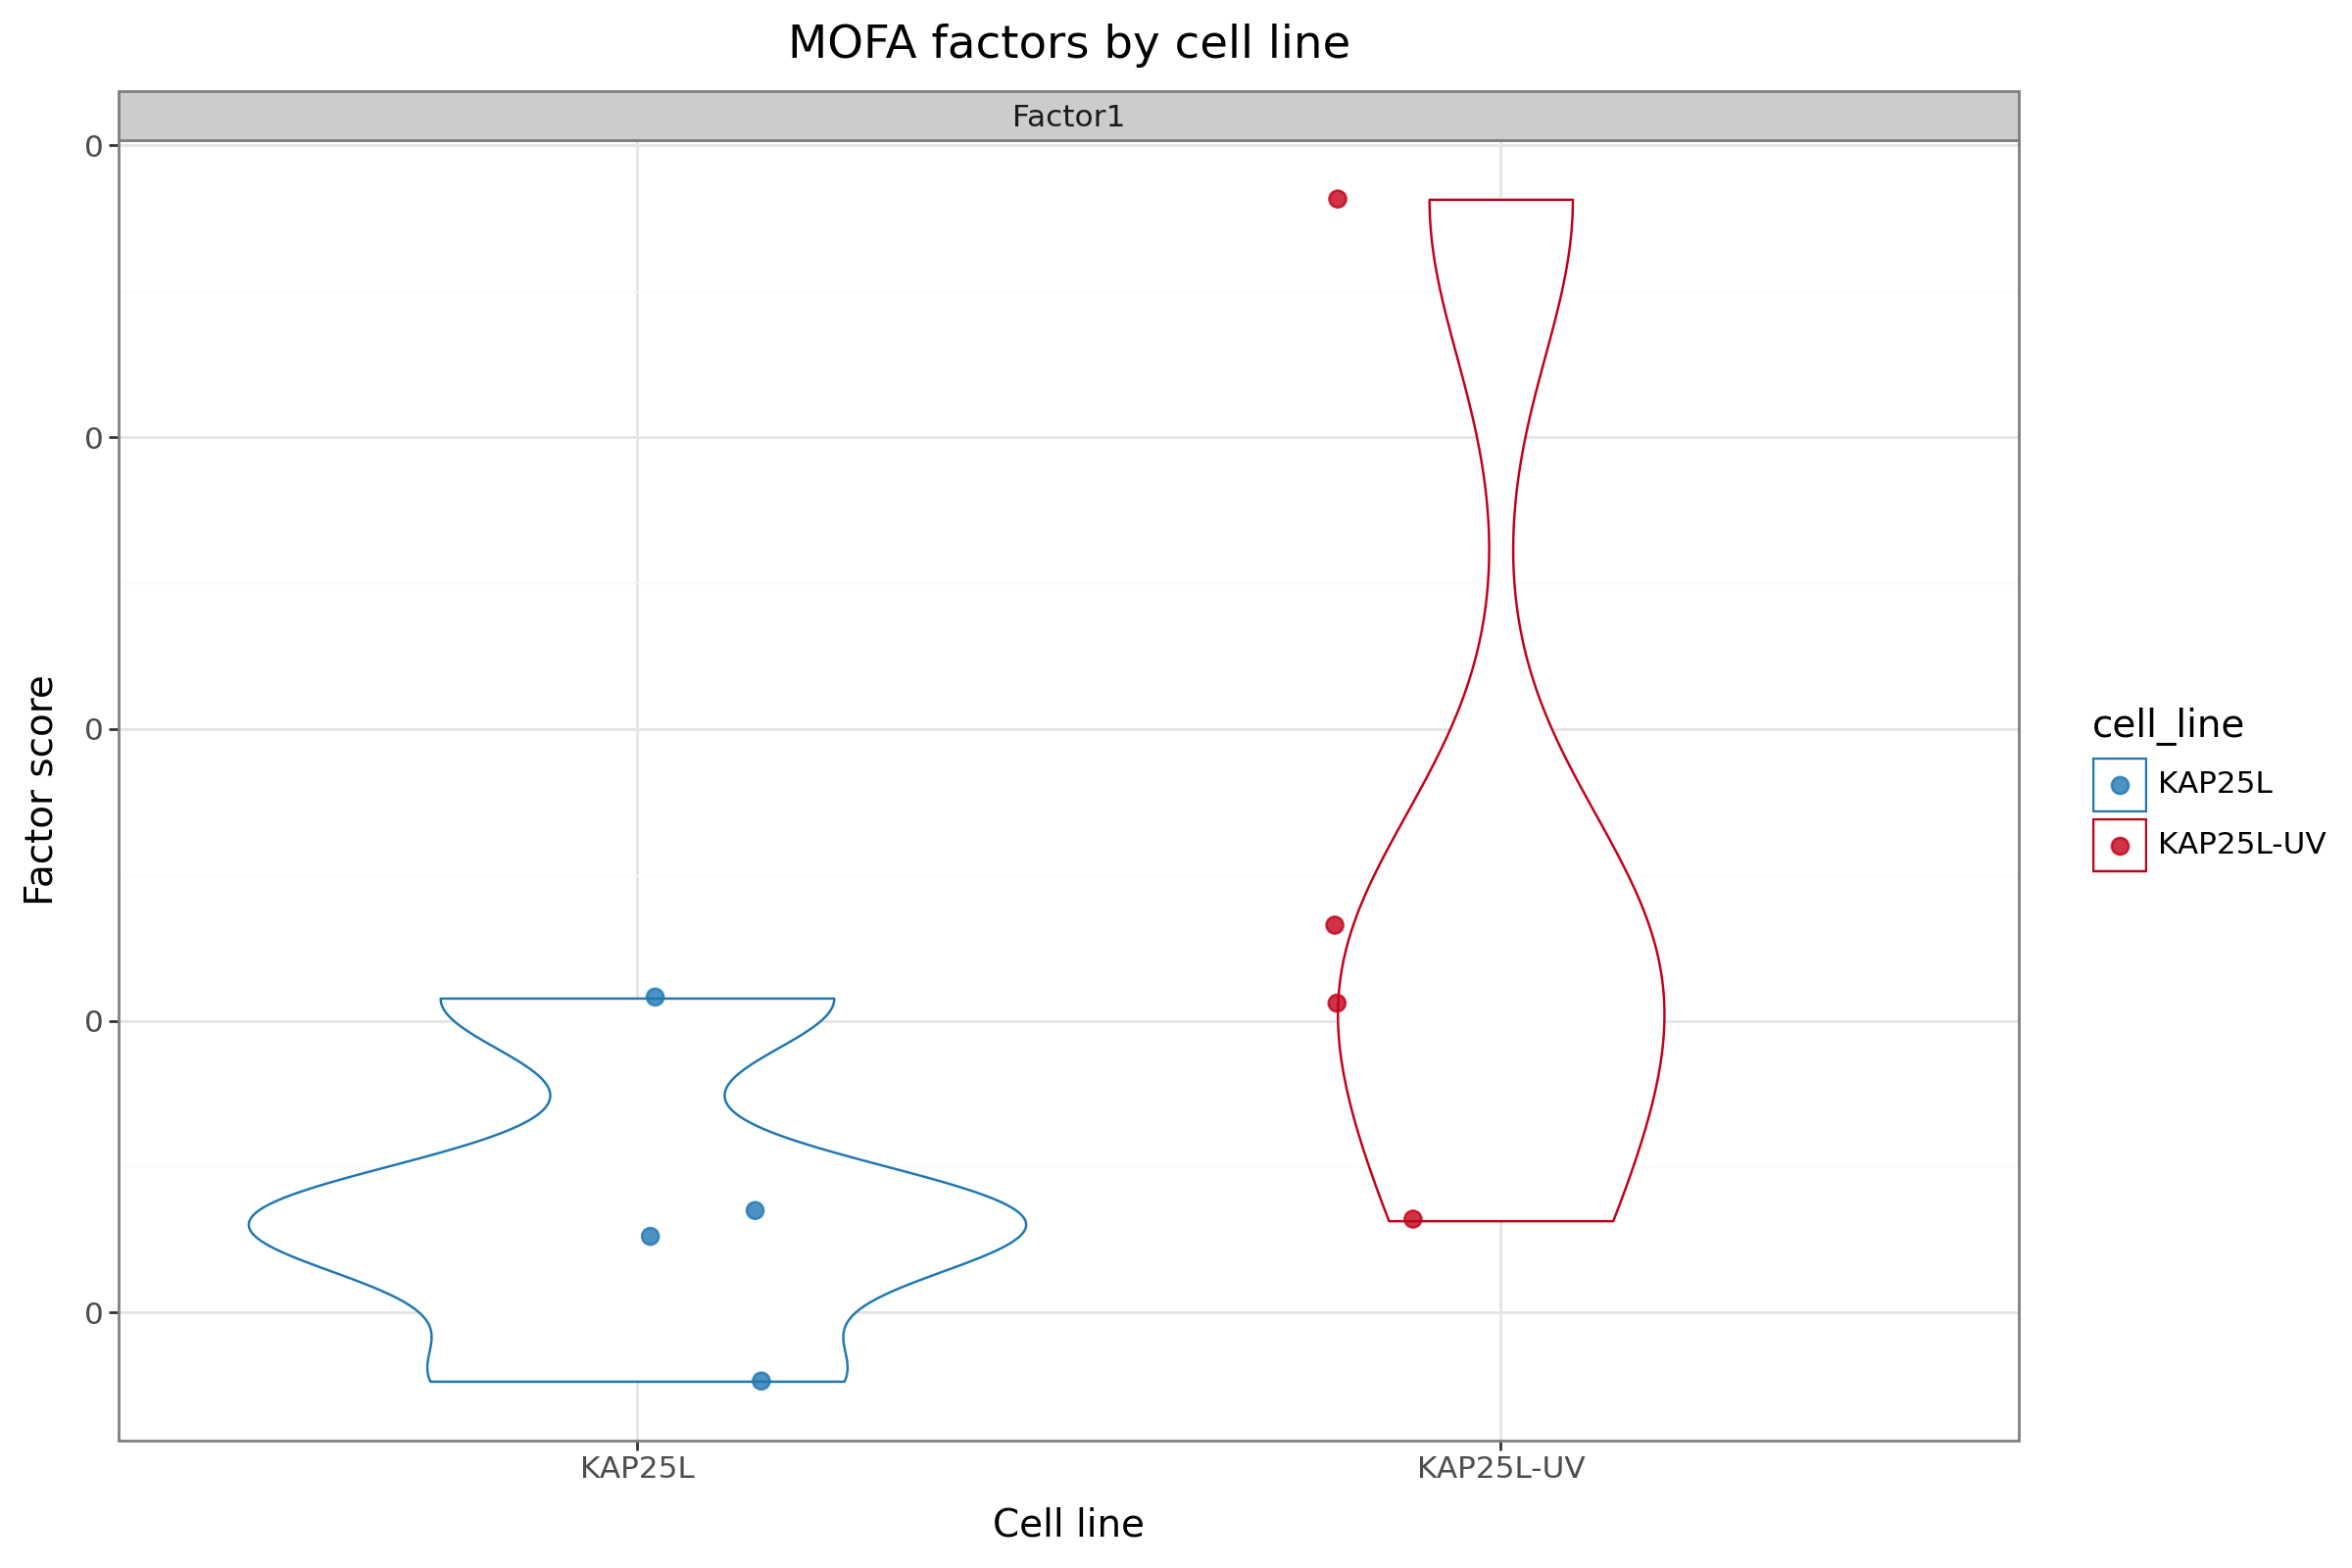

In [63]:
plot = (
    p9.ggplot(long_df) +
    p9.aes(x='cell_line', y='Score', colour='cell_line') +
    p9.geom_violin() +
    p9.geom_jitter(width=0.2, size=3, alpha=0.8) +
    p9.facet_wrap('~Factor', scales='free_y') +
    p9.theme_bw(base_size=14) +
    p9.theme(figure_size=(12, 8), subplots_adjust={'wspace': 0.25}) +
    p9.scale_colour_manual(values=['#1f77b4', '#c20019']) +
    p9.labs(x='Cell line', y='Factor score', title='MOFA factors by cell line')
)

plot

In [40]:
variable_loadings =  li.ut.get_variable_loadings(mdata,
                                                 varm_key='LFs',
                                                 view_sep=':',
                                                 pair_sep="&",
                                                 variable_sep="^") # get loadings for factor 1
variable_loadings.head()

,ligand_complex,receptor_complex,source,target,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7
59286,TNC,ITGA2,Endothelial,Plasmacytoid Dendritic cells,1.180624e-50,1.284484e-47,1.829947e-47,-6.189134e-48,-9.064714e-49,-7.304624e-45,1.385603e-23
26749,ADAM17,IL6R,Natural killer cells,Macrophages,1.167073e-50,1.253045e-47,1.799784e-47,-6.067173e-48,-8.772711e-49,-7.186003e-45,2.335506e-23
27570,ADAM9,ITGAV,Cancer cells,Cancer cells,1.162729e-50,1.302670e-47,1.780365e-47,-6.044198e-48,-8.705849e-49,-6.988150e-45,4.298670e-23
827,ARF1,INSR,Natural killer cells,Pre-B cells,1.118394e-50,1.221370e-47,1.757451e-47,-5.835671e-48,-8.536286e-49,-7.156983e-45,2.400608e-23
35942,TGFB1,TGFBR3,Macrophages,Endothelial,1.110563e-50,1.177180e-47,1.680331e-47,-5.669611e-48,-8.266717e-49,-6.649767e-45,1.814113e-23


In [42]:
model = mofa.mofa_model("/root/workdir/HDAC_tfm/data/anndata/MOFA/mofatalk_5f.h5ad")
model

MOFA+ model: mofatalk 5f.h5ad
Samples (cells): 8
Features: 90739
Groups: group1 (8)
Views: Cancer cells&Cancer cells (1006), Cancer cells&Endothelial (1020), Cancer cells&Macrophages (810), Cancer cells&Naive CD8+ T cells (1050), Cancer cells&Natural killer  cells (1056), Cancer cells&Plasmacytoid Dendritic cells (1054), Cancer cells&Pre-B cells (1012), Cancer cells&Pro-B cells (3006), Endothelial&Cancer cells (856), Endothelial&Endothelial (899), Endothelial&Macrophages (727), Endothelial&Naive CD8+ T cells (912), Endothelial&Natural killer  cells (909), Endothelial&Plasmacytoid Dendritic cells (897), Endothelial&Pre-B cells (855), Endothelial&Pro-B cells (3006), Macrophages&Cancer cells (712), Macrophages&Endothelial (702), Macrophages&Macrophages (640), Macrophages&Naive CD8+ T cells (748), Macrophages&Natural killer  cells (706), Macrophages&Plasmacytoid Dendritic cells (719), Macrophages&Pre-B cells (703), Macrophages&Pro-B cells (3006), Naive CD8+ T cells&Cancer cells (891), Naiv

In [43]:
# get variance explained by view and factor
rsq = model.get_r2()
factor1_rsq = rsq[rsq['Factor']=='Factor1']
# separate view column
factor1_rsq[['source', 'target']] = factor1_rsq['View'].str.split(pat='&', n=1, expand=True)

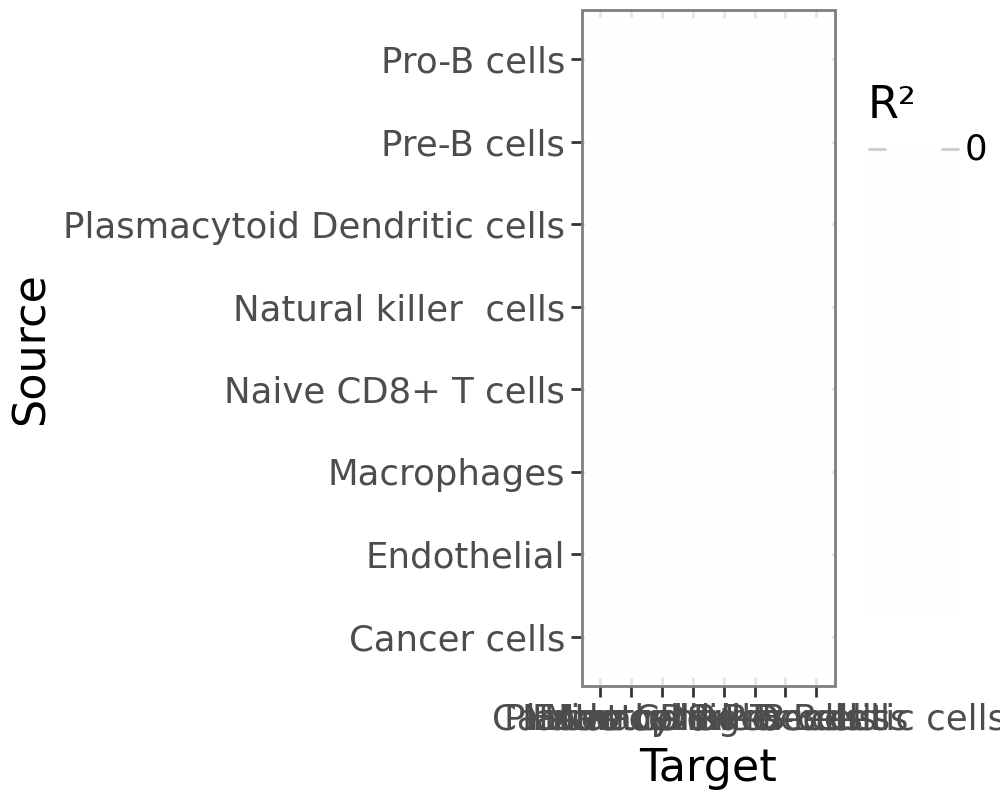

In [44]:
(p9.ggplot(factor1_rsq.reset_index()) +
 p9.aes(x='target', y='source') +
 p9.geom_tile(p9.aes(fill='R2')) +
 p9.scale_fill_gradient2(low='white', high='#c20019') +
 p9.theme_bw(base_size=16) +
 p9.theme(figure_size=(5, 4)) +
 p9.labs(x='Target', y='Source', fill='R²')
 )